In [1]:
!pip install --upgrade xee

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.1/472.1 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: earthengine-api
    Found existing installation: earthengine-api 1.5.24
    Uninstalling earthengine-api-1.5.24:
      Successfully uninstalled earthengine-api-1.5.24


In [ ]:
!pip install -U geemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.4 MB/s eta 0:00:00
  Attempting uninstall: geemap
    Found existing installation: geemap 0.35.3
    Uninstalling geemap-0.35.3:
      Successfully uninstalled geemap-0.35.3


In [ ]:
import ee

In [ ]:
ee.Authenticate()
ee.Initialize(
    project = 'ee-jawahirkhaleel05',  # Replace with your actual project ID
    opt_url = 'https://earthengine-highvolume.googleapis.com'
)

In [ ]:
import geemap

In [ ]:
map = geemap.Map()
map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], position='topright', transp…

In [ ]:
roi = map.draw_last_feature.geometry()
roi

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Feature.geometry",
    "arguments": {
      "feature": {
        "functionInvocationValue": {
          "functionName": "Feature",
          "arguments": {
            "geometry": {
              "functionInvocationValue": {
                "functionName": "GeometryConstructors.Point",
                "arguments": {
                  "coordinates": {
                    "constantValue": [
                      75.231628,
                      35.708608
                    ]
                  }
                }
              }
            }
          }
        }
      }
    }
  }
})

In [ ]:
border = (
    ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017")
    .filterBounds(roi)
    .geometry().simplify(100)
)

In [ ]:
map.addLayer(border, {},'border')

In [ ]:
gpm = (
    ee.ImageCollection("NASA/GPM_L3/IMERG_MONTHLY_V07")
    .filterDate('2015','2025')
    .select('precipitation')
    .map(
        lambda img: img.clip(border).copyProperties(img, ['system:time_start'])
    )
)

In [ ]:
gpm.getInfo()

import xarray as xr

pr = xr.open_dataset(
    gpm,
    engine = 'ee',
    crs = 'EPSG:4326',
    scale = 0.1,
    geometry = border
)

In [ ]:
pr = pr.sortby('time') * 730.001

In [ ]:
import numpy as np

In [ ]:
pr_annual = pr.resample(time = 'YE').sum('time')

In [ ]:
pr_annual = xr.where(pr_annual == 0,  np.nan, pr_annual)

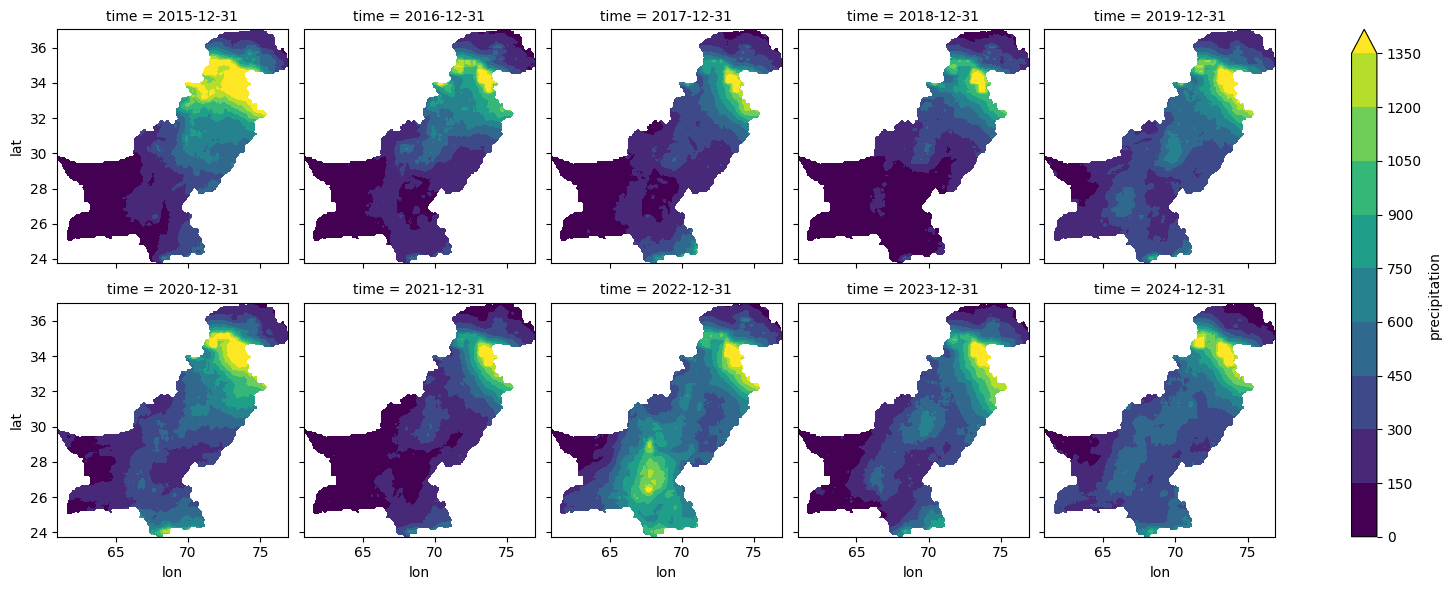

In [ ]:
pr_annual.precipitation.plot.contourf(
    x = 'lon',
    y = 'lat',
    col = 'time',
    col_wrap = 5,
    robust = True,
    levels = 10
)

In [ ]:
annual_change = pr_annual.diff('time')

In [ ]:
import matplotlib.pyplot as plt


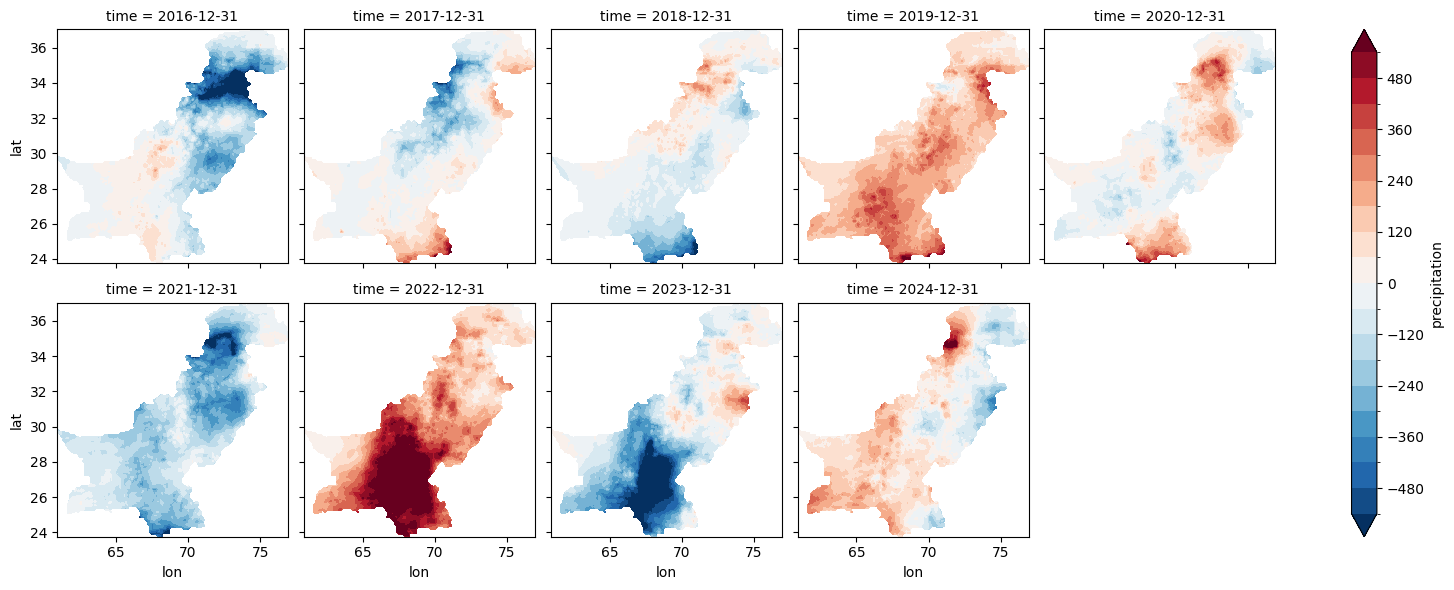

In [ ]:
annual_change.precipitation.plot.contourf(
    x = 'lon',
    y = 'lat',
    col = 'time',
    col_wrap = 5,
    robust = True,
    levels = 20
)

In [ ]:
plt.savefig('pr_change.png', dpi = 360, bbox_inches = 'tight')

<Figure size 640x480 with 0 Axes>

In [ ]:
mean_change = annual_change.mean(dim = 'time')

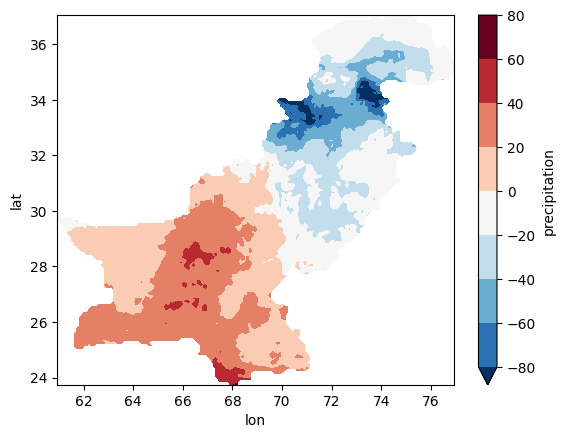

In [ ]:
mean_change.precipitation.plot.contourf(
    x = 'lon',
    y = 'lat',
    robust =True,
    levels = 10
)